# Exploring Wildfire Data Visually with SQL and Tableau

The data for this project were downloaded from: https://www.kaggle.com/datasets/rtatman/188-million-us-wildfires as a .sqlite file

### Data preparation and transformation

In [1]:
# module imports

import sqlite3
import pandas as pd

In [2]:
# Setting up execute function to return DataFrame for simple queries, clean display, and extended toolset

connection = sqlite3.connect(r"C:\Users\wootw\Documents\Jobs\Data Analysis\Datasets\Wildfire\FPA_FOD_20170508.sqlite")

def execute(query):
    return pd.read_sql_query(query, connection)

pd.options.display.max_columns = None
pd.options.display.max_rows = 200

In [3]:
# preview of dataset

execute("""
SELECT
    *
FROM
    Fires
LIMIT 5
""")

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,None,None,None,None,None,2005,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33,1730,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,13,AAC0,PIGEON,None,None,None,None,None,2004,2453137.5,133,0845,1.0,Lightning,2453137.5,133,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,021,A32W,SLACK,None,None,None,None,None,2004,2453156.5,152,1921,5.0,Debris Burning,2453156.5,152,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,6,None,DEER,None,None,None,None,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,7,None,STEVENOT,None,None,None,None,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [4]:
# Checking for missing values in relevent columns

execute("""
SELECT    
    FIRE_YEAR,
    STATE,
    FIRE_SIZE,
    STAT_CAUSE_DESCR,
    DISCOVERY_DATE
FROM
    Fires
WHERE
    NULL IN (FIRE_YEAR, STATE, FIRE_SIZE, STAT_CAUSE_DESCR, DISCOVERY_DATE, CONT_DATE) OR
    LOWER(FIRE_YEAR) in ('none', 'na') OR
    LOWER(STATE) in ('none', 'na') OR
    LOWER(STAT_CAUSE_DESCR) in ('none', 'na') OR
    LOWER(DISCOVERY_DATE) in ('none', 'na')
""")

,FIRE_YEAR,STATE,FIRE_SIZE,STAT_CAUSE_DESCR,DISCOVERY_DATE


In [5]:
# Year range of data

execute("""
SELECT 
    MIN(FIRE_YEAR),    
    MAX(FIRE_YEAR)
FROM Fires
""")

,MIN(FIRE_YEAR),MAX(FIRE_YEAR)
0,1992,2015


In [6]:
# Inspecting fire causes to ensure no duplicates due to typo or whitespace

execute("""
SELECT DISTINCT
    STAT_CAUSE_DESCR
FROM
    FIRES
""")

,STAT_CAUSE_DESCR
0,Miscellaneous
1,Lightning
2,Debris Burning
3,Campfire
4,Equipment Use
5,Arson
6,Children
7,Railroad
8,Smoking
9,Powerline


#### Quering Data for importation into Tableau (Vizualizations Below)

In [7]:
# Querying fire size, dates, and causes to visualize total US fire severity over time and accross cuase categories
execute("""
SELECT
    DATETIME(DISCOVERY_DATE) AS DISCOVERY_DATE,
    FIRE_SIZE AS FIRE_SIZE_ACRES,
    STAT_CAUSE_DESCR
FROM
    Fires
""").to_csv('fire_timeseries.csv')

### Visualized: Wildfire Severity Over Time

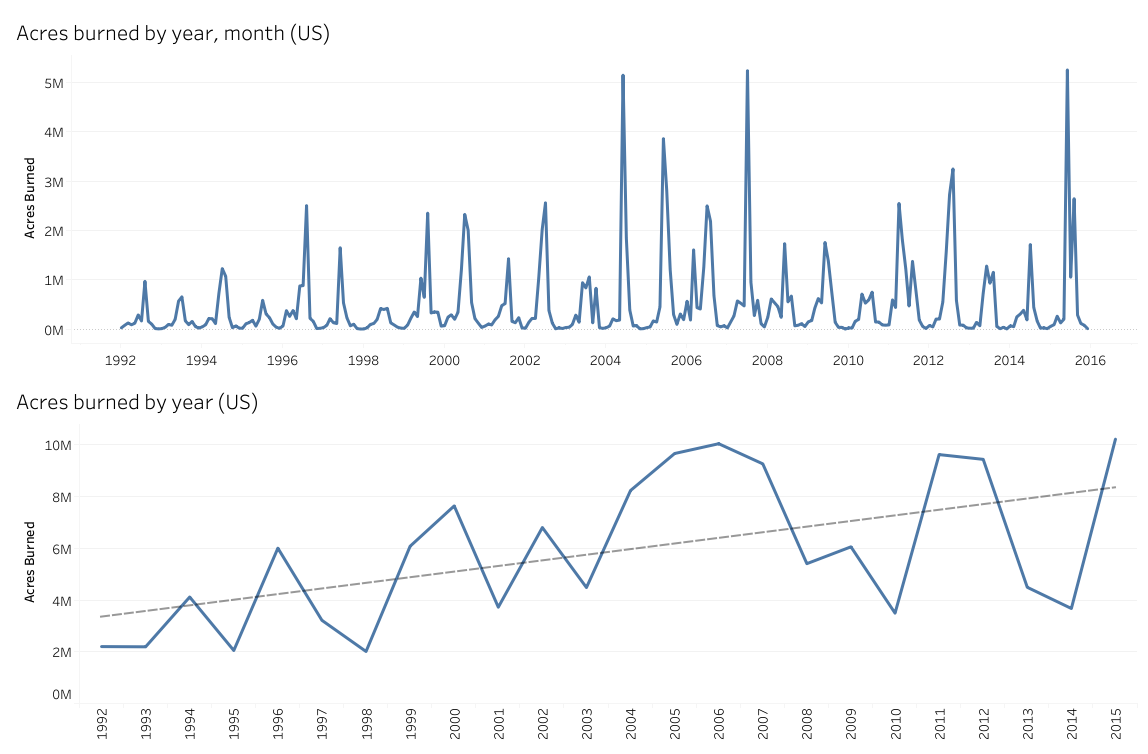

**Link to interactive dashboard**: https://public.tableau.com/views/Wildfire_time_series/Dashboard1?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

#### Discussion:

In the monthly breakdown, it can be observed that:
- The most severe fires occur during the summer months
- The severity of fires are much greater after 2004 compared to before 2004
- The yearly breakdown further illustrates the general upward trend in wildfire severity during the analyzed period
    - note: the R^2 value of the regression line is .295, indicating a fairly poor fit in predictive analysis on its own.

### Visualized: Overall Average Wildfire Severity by Month and by Cause

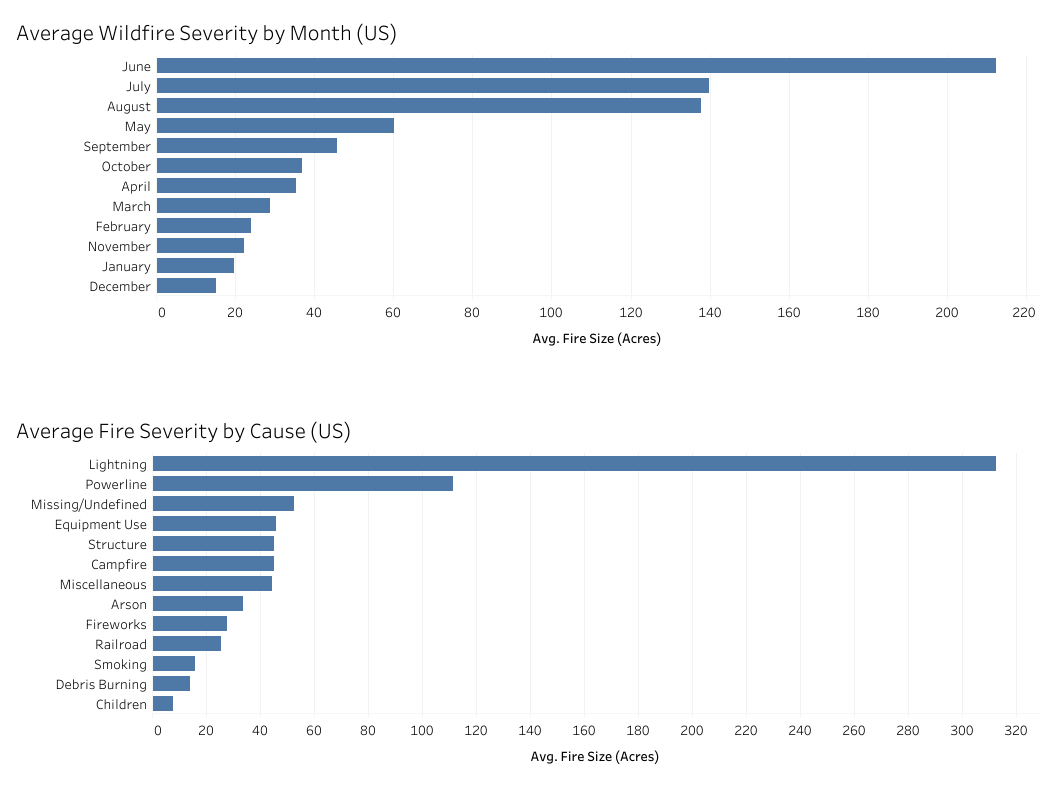

#### Discussion:
- The overall monthly severity confirms that June's average severity is highest of all months
- The remaining 2 summer months are the next most severe wildfire periods on average.
- Lightning is responsible for nearly 3x wildfire acres (312.5) than the next highest cause (powerlines: 111.4 acres)   

In [8]:
# Calculating the leading cause of wildfire per state for map visualization

execute("""
WITH FireCauseCounts AS
(
SELECT      
    STATE,
    STAT_CAUSE_DESCR,
    COUNT(STAT_CAUSE_DESCR) AS CAUSE_COUNT     
FROM
    Fires
GROUP BY
    STATE,
    STAT_CAUSE_DESCR
),
        
LeadingCause AS 
(    
SELECT
    STATE,
    STAT_CAUSE_DESCR AS LEADING_CAUSE,
    CAUSE_COUNT
FROM
    FireCauseCounts
WHERE (STATE, CAUSE_COUNT) IN 
    (
        SELECT
            STATE,
            MAX(CAUSE_COUNT)
        FROM 
            FireCauseCounts
        GROUP BY
            STATE
    )
)
        
SELECT
    F.STATE,
    COUNT(F.STATE) AS NUM_FIRES,
    SUM(F.FIRE_SIZE) AS TOTAL_FIRE_ACRES,
    AVG(F.FIRE_SIZE) AS AVERAGE_FIRE_ACRES,
    L.LEADING_CAUSE
FROM
    Fires F
LEFT JOIN
    LeadingCause L
ON
    F.STATE = L.STATE
GROUP BY   
    F.STATE               
""").to_csv('wildfire.csv', index=False)

### Visualization

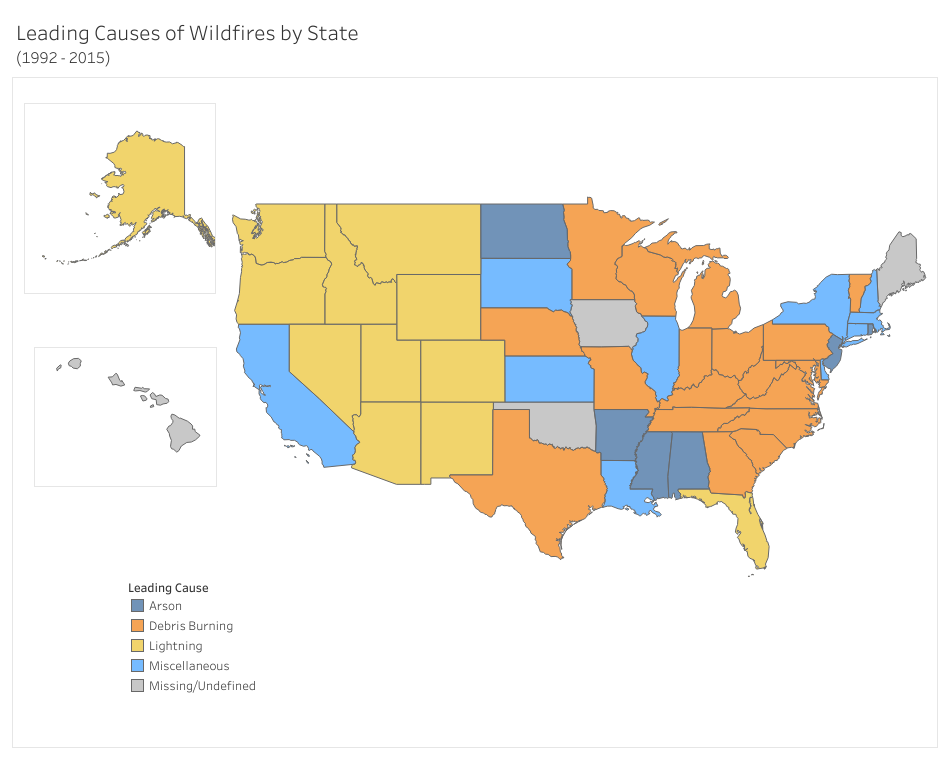

**Link to interactive dashboard**: https://public.tableau.com/shared/BF3TGWXPS?:display_count=n&:origin=viz_share_link